5.1 Solution

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
jeni = ("data/Justice_Equity_Need_Index.geojson")
data=gpd.read_file(jeni)

data.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [4]:
data_dis= data.dissolve(by='sup_dist', aggfunc='mean')

data_dis.head()


/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


,geometry,OBJECTID,jenipctl,jenirank,riskpctl,driverspctl,systempctl,SHAPE_Length,SHAPE_Area
sup_dist,,,,,,,,,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833...",170.288889,60.502222,110.022222,51.293333,66.386667,59.186667,0.225481,0.001370
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8...",183.510204,65.157143,97.163265,56.816326,66.685714,64.944898,0.172835,0.000868
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0...",108.966667,38.586667,170.483333,52.178333,36.520000,33.781667,0.216787,0.001795
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725...",144.785714,51.292857,135.428571,47.075000,52.373214,54.114286,0.233778,0.001278
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1...",117.085714,41.464286,162.571429,47.417143,37.964286,43.655714,0.524372,0.009303


AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

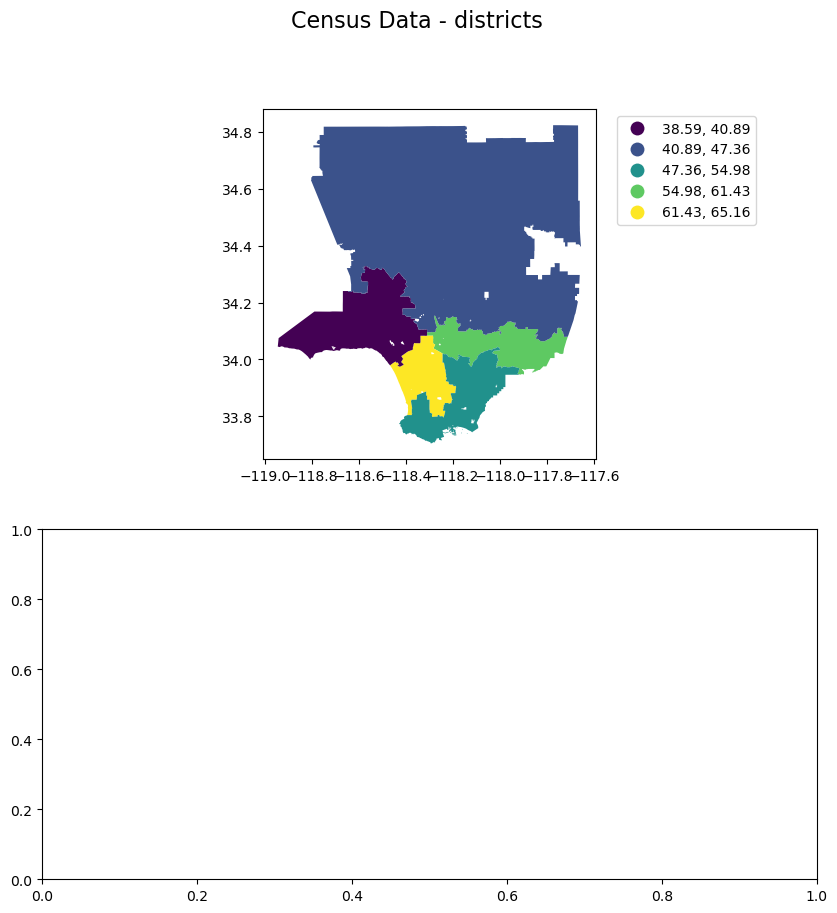

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

data_dis.plot(column='jenipctl',
                 legend=True,
                 scheme="quantiles",
                 ax=ax1)

plt.suptitle('Census Data - districts', fontsize=16)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

5.2 Solution

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

# Load the box module from shapely to create box objects
from shapely.geometry import box
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

In [4]:
jeni = ("data/Justice_Equity_Need_Index.geojson")
data=gpd.read_file(jeni)

boundary_longbeach = ("data/LB_City_Boundary.geojson")
data_boundary=gpd.read_file(boundary_longbeach)

neighborhoods = ("data/LB_Neighborhoods.geojson")
data_neighbor=gpd.read_file(neighborhoods)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [5]:
print(data.crs)
print(data_boundary.crs)
print(data_neighbor.crs)

#always check crs of each dataset to make sure they are the same. 

epsg:4326
epsg:4326
epsg:4326


In [7]:
clip_boundary = gpd.clip(data, data_boundary)

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [8]:
joined_data = gpd.sjoin(clip_boundary, 
                         data_neighbor, 
                         how="inner", 
                         op='intersects')

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

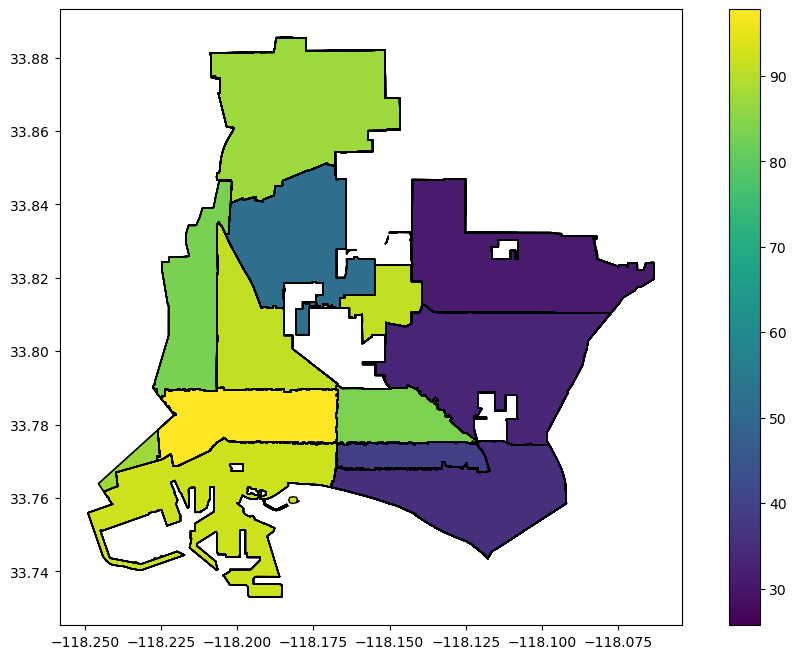

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

joined_data.plot(alpha=1,
                    facecolor="none",
                    edgecolor="black",
                    zorder=10,
                    ax=ax)

joined_data.plot(column='jenipctl',
                  ax=ax,
                  legend=True)



5.3 Solution

In [29]:
jeni = ("data/Justice_Equity_Need_Index.geojson")
data=gpd.read_file(jeni)

data_new = data[['zip', 'csa']]

data_new.head()

,zip,csa
0,91108,City of San Marino
1,90631,City of La Habra Heights
2,90274,City of Rancho Palos Verdes
3,91361,City of Westlake Village
4,90275,City of Rancho Palos Verdes


In [45]:
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
pointlmu = Point(33.9710, -118.4170)


pointlmu_re = gpd.GeoSeries(pointlmu, crs=CRS('epsg:4326')).to_crs('epsg:3857')

In [55]:
centroid=data.centroid

print(centroid)
 #I received a warning. Should I reproject?

0      POINT (-118.11364 34.12237)
1      POINT (-117.95078 33.95981)
2      POINT (-118.36846 33.77734)
3      POINT (-118.83252 34.13044)
4      POINT (-118.36413 33.75576)
                  ...             
276    POINT (-118.28745 34.00308)
277    POINT (-118.27400 33.92033)
278    POINT (-118.24959 33.92567)
279    POINT (-118.25179 34.04302)
280    POINT (-118.23915 34.02903)
Length: 281, dtype: geometry


/tmp/ipykernel_116811/1664758237.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=data.centroid


In [56]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
     # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

NameError: name 'row' is not defined